# Koneoppiminen: Tehtävä 2:  KMeans-klusterointi (max. 8p)

**KMeans**-klusterointitekniikka on yksi ohjaamattoman oppimisen tekniikka.

**Muista** kirjoittaa alle omat tietosi.

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'
student_id = 'AB6802'

"""
Kiirettä pitää kun aloitti kurssit myöhemmin, mutta ei anneta sen haitata! tässä vähän välipohdintaa.

Toivottavasti ymmärsin tehtävät oikein. Kun tein viimeisen tehtävän niin palasin aijempiin tehtäviin ja
muuttelin nimiä jotta sain tehtyä palkkikuvaajat molemmista tehtävistä 2.2 sekä 2.3.

On mielenkiintoista nähdä miten pelkkää tulosta katsomalla voisi luulla että 2.2 tehtävä oli
onnistuneempi sillä klusterin pisteillä on huomattavasti vähemmän keskiarvoista matkaa klusterin keski-
pisteelle kuin 2.3. kohdassa. Tämähän ei kuitenkaan ole onnistunut klusterointi ja tämä
nähdään tässä tapauksessa helposti silmällä. Voisi olettaa että n_clusters=8 malli on ylioppinut?

n_clusters=3 kuvaa paremmin todellista klusterointirakennetta.
"""

'\nKiirettä pitää kun aloitti kurssit myöhemmin, mutta ei anneta sen haitata! tässä vähän välipohdintaa.\n\nToivottavasti ymmärsin tehtävät oikein. Kun tein viimeisen tehtävän niin palasin aijempiin tehtäviin ja\nmuuttelin nimiä jotta sain tehtyä palkkikuvaajat molemmista tehtävistä 2.2 sekä 2.3.\n\nOn mielenkiintoista nähdä miten pelkkää tulosta katsomalla voisi luulla että 2.2 tehtävä oli\nonnistuneempi sillä klusterin pisteillä on huomattavasti vähemmän keskiarvoista matkaa klusterin keski-\npisteelle kuin 2.3. kohdassa. Tämähän ei kuitenkaan ole onnistunut klusterointi ja tämä\nnähdään tässä tapauksessa helposti silmällä. Voisi olettaa että n_clusters=8 malli on ylioppinut?\n\nn_clusters=3 kuvaa paremmin todellista klusterointirakennetta.\n'

Tutki tehtävää varten myös seuraavat scikit Learn -manuaalisivut:
* [Clustering](https://scikit-learn.org/stable/modules/clustering.html)
* [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

## Tehtävä 2: KMeans-harjoitus

Harjoituksessa generoidaan **synteettistä aineistoa** ja käytetään kolmea toisistaan erottuvaa klusteria, jotka
pystytään piirtämään X/Y-koordinaatistoon.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
"""
# TODO: Tätä funktiota käytetään tehtävässä 2.4, siirrän tämän helpottaakseni koodin lukua
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x - cx) ** 2 + (y - cy) ** 2) for (x, y) in data[cluster_labels == i_centroid]]
    return np.mean(distances)
"""

'\n# TODO: Tätä funktiota käytetään tehtävässä 2.4, siirrän tämän helpottaakseni koodin lukua\ndef k_mean_distance(data, cx, cy, i_centroid, cluster_labels):\n    distances = [np.sqrt((x - cx) ** 2 + (y - cy) ** 2) for (x, y) in data[cluster_labels == i_centroid]]\n    return np.mean(distances)\n'

## Tehtävä 2.1
### Aihe: Synteettisen aineiston generointi (2 pistettä)

Generoidaan satunnaista dataa NumPy-matriisiin ja jaetaan joukko kolmeen osaan, joissa kaikissa on 100 pistettä.
Pisteet voi generoida esim. NumPyn funktiolla `np.random.rand()`, mutta generointitapa on vapaa.
* Satunnaisuudesta seuraa, että pistejoukko on joka ajokerralla erilainen

Pistejoukot generoidaan satunnaisluvuilla käyttäen seuraavia "lukualueita":

* **100** pistettä, joiden (x, y) arvot ovat välillä **[[-1, 0], [-1, 0]]**
* **100** pistettä, joiden (x, y) arvot ovat välillä **[[1, 2], [1, 2]]**
* **100** pistettä, joiden (x, y) arvot ovat välillä **[[2, 3], [3, 4]]**

Yhteensä generoituja pisteitä on samassa matriisissa 300 kappaletta. 

In [3]:
# TODO: Generoi yhteensä 300 pistettä, joissa kaikissa arvot ovat erillisissä arvojoukoissa
points_1 = np.random.rand(100, 2) - 1
points_2 = np.random.rand(100, 2) + 1
points_3 = np.random.rand(100, 2)
points_3[:, 0] += 2
points_3[:, 1] += 3
# TODO: Yhdistä generoitujen matriisien arvot yhteen datajoukkoon
all_points = np.vstack((points_1, points_2, points_3))
# TODO: sekoita arvot ennen seuraavaa vaihetta
np.random.shuffle(all_points)
X = all_points

# Tulostetaan taulukon koko
print(f"Matriisin pituus: {len(X)}")

Matriisin pituus: 300


## Tehtävä 2.2
### Aihe: K-Means -klusterointi ja piirtäminen (2 pistettä)

Suorita **klusterointi** aineistolle käyttäen `scikit-learn`-kirjaston `cluster`-moduulin tarjoamaa
[k-means -menetelmää](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html).

**KMeans**-algoritmiä käytettäessä mahdollisten klusterien määrä voidaan asettaa etukäteen, mutta tässä ne ajetaan oletuksilla.


In [4]:
kmean = KMeans()
# Haluaisin laittaa klustereiden määrän = 3 mutta ajetaan oletuksella(8?) ohjeen mukaan
# TODO: Sovitetaan koko aineisto
kmean.fit(X)

KMeans()

Etsitään klusterien keskipisteet (centroids).
Vinkki: `cluster_centers_`

In [5]:
# TODO: Klusterien keskipisteiden hakeminen
centroids = kmean.cluster_centers_
cluster_labels = kmean.labels_

# Tulostetaan klustereiden keskipisteet ja niiden lukumäärä
print(f"Keskipisteiden lukumäärä {len(centroids)} ja sijainnit: {centroids}")

Keskipisteiden lukumäärä 8 ja sijainnit: [[ 2.32808743  3.19799269]
 [-0.52700352 -0.7822884 ]
 [ 1.50974095  1.26621972]
 [-0.79450626 -0.23761269]
 [ 2.78678212  3.50331198]
 [ 1.59260394  1.71314713]
 [ 2.25268819  3.69579161]
 [-0.21187532 -0.33010401]]


*Klusterien ja keskipisteiden piirtäminen*

* Piirretään kaikki datapisteet scatter plot -kuvaajaa käyttäen.
* Piirretään lasketut klusterien keskipisteet.
Vinkki: `plt.scatter`

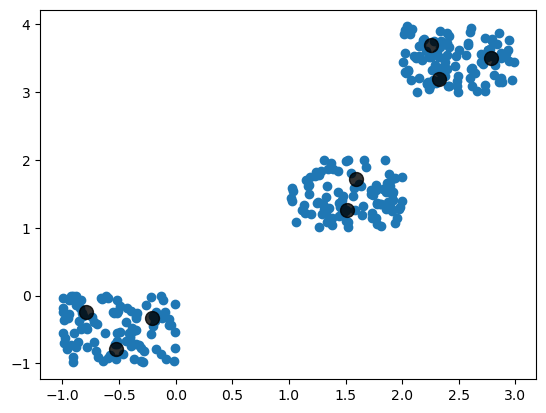

In [6]:
# TODO: Piirretään pisteet scatter plot -kuvaajaan
plt.scatter(X[:, 0], X[:, 1], c='#1f77b4')
# TODO:  Piirretään lasketut klusterien keskipisteet (centroids)
# Keskipisteitä piirtyy ilmeisesti liikaa koska ei ole määritetty n_clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.8);

## Tehtävä 2.3
### Aihe: K-Means -klusterointi - keskipisteiden määrän asetus (2 pistettä)

Asetetaan klusterien keskipisteiden (centroids) määräksi *optimaalinen lukumäärä*.

Koska pistejoukko on tehtävässä yksinkertainen, niin optimaalisen klusterien lukumäärän voi tehtävässä nähdä tutkimalla pisteiden jakaantumista kuvion avulla.
Optimaalisen klusterimäärän laskemiseen voi halutessaan käyttää myös muita tekniikoita (esim. *Silhouette Coefficient*).


In [7]:
# TODO: Asetetaan optimaalinen klusterimäärä kMeans-klusteroinnille
kmean_3 = KMeans(n_clusters=3)
kmean_3.fit(X)
# TODO: Klusterien keskipisteiden hakeminen
centroids_3 = kmean_3.cluster_centers_
cluster_labels_3 = kmean_3.labels_
# Tulostetaan klustereiden keskipisteet ja niiden lukumäärä
print(f"Keskipisteiden lukumäärä {len(centroids_3)} ja sijainnit: {centroids_3}")

Keskipisteiden lukumäärä 3 ja sijainnit: [[ 1.54371477  1.44945996]
 [ 2.45457493  3.4630217 ]
 [-0.54137117 -0.4686372 ]]


*Klusterien ja keskipisteiden piirtäminen*

* Piirretään kaikki datapisteet scatter plot -kuvaajaa käyttäen.
* Piirretään lasketut klusterien keskipisteet.
Vinkki: `plt.scatter`

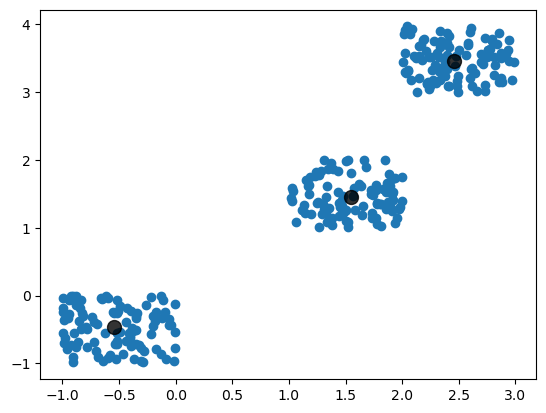

In [8]:
# TODO: Piirretään pisteet scatter plot kuvaajaan
plt.scatter(X[:, 0], X[:, 1], c='#1f77b4')
# TODO:  Piirretään lasketut klusterien keskipisteet (centroids)
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], c='black', s=100, alpha=0.8);

Huom! **KMeans**-algoritmiä voi tuunata seuraavasti alla olevia parametreja muuttaen.

    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0)``

## Tehtävä 2.4:
### Aihe: Klusterien etäisyydet viivadiagrammina (2 p)

Piirretään erikseen jokaisen klusterien sisältämien pisteiden keskimääräiset etäisyydet tietyn klusterin keskustasta (centroid).
* Piirrä erikseen tehtävissä 2.2 sekä 2.3 muodostuneet klusterit sekä niiden klustereiden sisältämien pisteiden etäisyys klusterin keskuksesta. 
* Piirrä kuvio pylväsdiagrammina
* Pylväsdiagrammeja tulee kuvioon sama määrä kuin klustereita.  

* käytetään piirtämiseen tämän dokumentin alussa annettua `k_mean_distance()`-funktiota

Vinkki: `plt.plot`

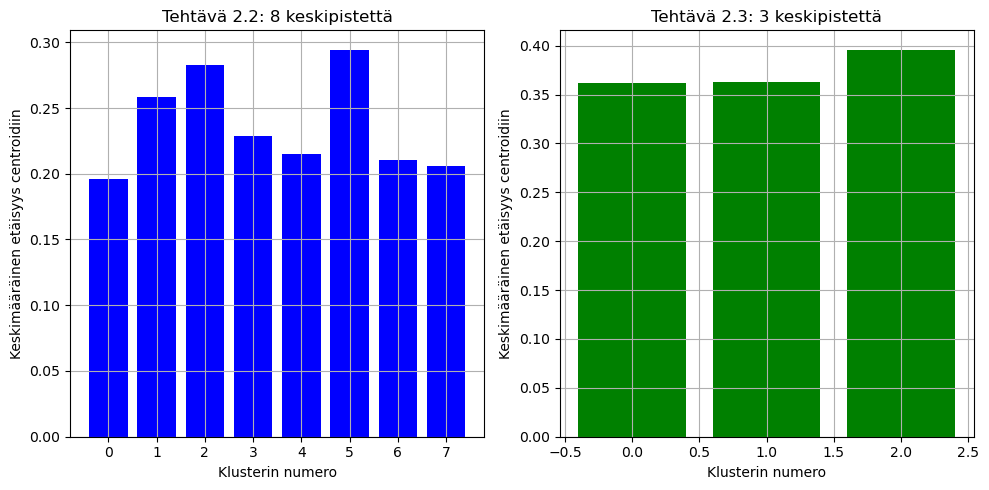

In [9]:
# TODO: Lasketaan ja piirretään klusterien pisteiden keskimääräiset etäisyydet keskustasta
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    # for looppi iteroi jokaisen pisteen x,y-muodossa X[i_centroid]- klusterista, ja vöhentää keskipisteen 
    # cx ja cy arvot näistä jolloin saamme tiedää klusteriin kuuluvan pisteen etäisyyden
    # klusterin keskipisteetsä, onpas sekavaa kommentointia mutta yritän aidosti yymmärtää mitä tehdään
    distances = [np.sqrt((x - cx) ** 2 + (y - cy) ** 2) for (x, y) in data[cluster_labels == i_centroid]]
    return np.mean(distances)
# Tyhjä lista cluster_distances keskimääräisille etäisyyksille
cluster_distances = []
# iteroidaan keskipisteiden sijainnit indekseille
for i_centroid, (cx, cy) in enumerate(centroids):
    # lasketaan saaduista matkoista keskiarvo keskipisteen indeksille ja lisätään ne cluster_distances listaan
    avg_distance = k_mean_distance(X, cx, cy, i_centroid, cluster_labels)
    cluster_distances.append(avg_distance)

cluster_distances_3 = []

for i_centroid, (cx, cy) in enumerate(centroids_3):
    # lasketaan saaduista matkoista keskiarvo keskipisteen indeksille ja lisätään ne cluster_distances listaan
    avg_distance = k_mean_distance(X, cx, cy, i_centroid, cluster_labels_3)
    cluster_distances_3.append(avg_distance)

# Piirretään kuva tehtävälle 2.2 (8 keskipistettä)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # ensimmäinen kuva vierekkäin
plt.bar(range(len(centroids)), cluster_distances, color='blue')  # Voit käyttää eri värejä
plt.xlabel('Klusterin numero')
plt.ylabel('Keskimääräinen etäisyys centroidiin')
plt.title('Tehtävä 2.2: 8 keskipistettä')
plt.grid(True)

# Piirretään kuva tehtävälle 2.3 (3 keskipistettä)
plt.subplot(1, 2, 2)  # toinen kuva vierekkäin
plt.bar(range(len(centroids_3)), cluster_distances_3, color='green')  # Voit käyttää eri värejä
plt.xlabel('Klusterin numero')
plt.ylabel('Keskimääräinen etäisyys centroidiin')
plt.title('Tehtävä 2.3: 3 keskipistettä')
plt.grid(True)

# Näytetään molemmat kuvat vierekkäin
plt.tight_layout()
plt.show()